In [7]:
import numpy as np 
import pandas as pd 
import pingouin
import matplotlib.pyplot as plt
import pingouin
from multiprocessing import Pool 

In [14]:
dfe = pd.read_csv('r490.csv')
dfe = dfe[dfe['r1_charge_heater'] > 0]


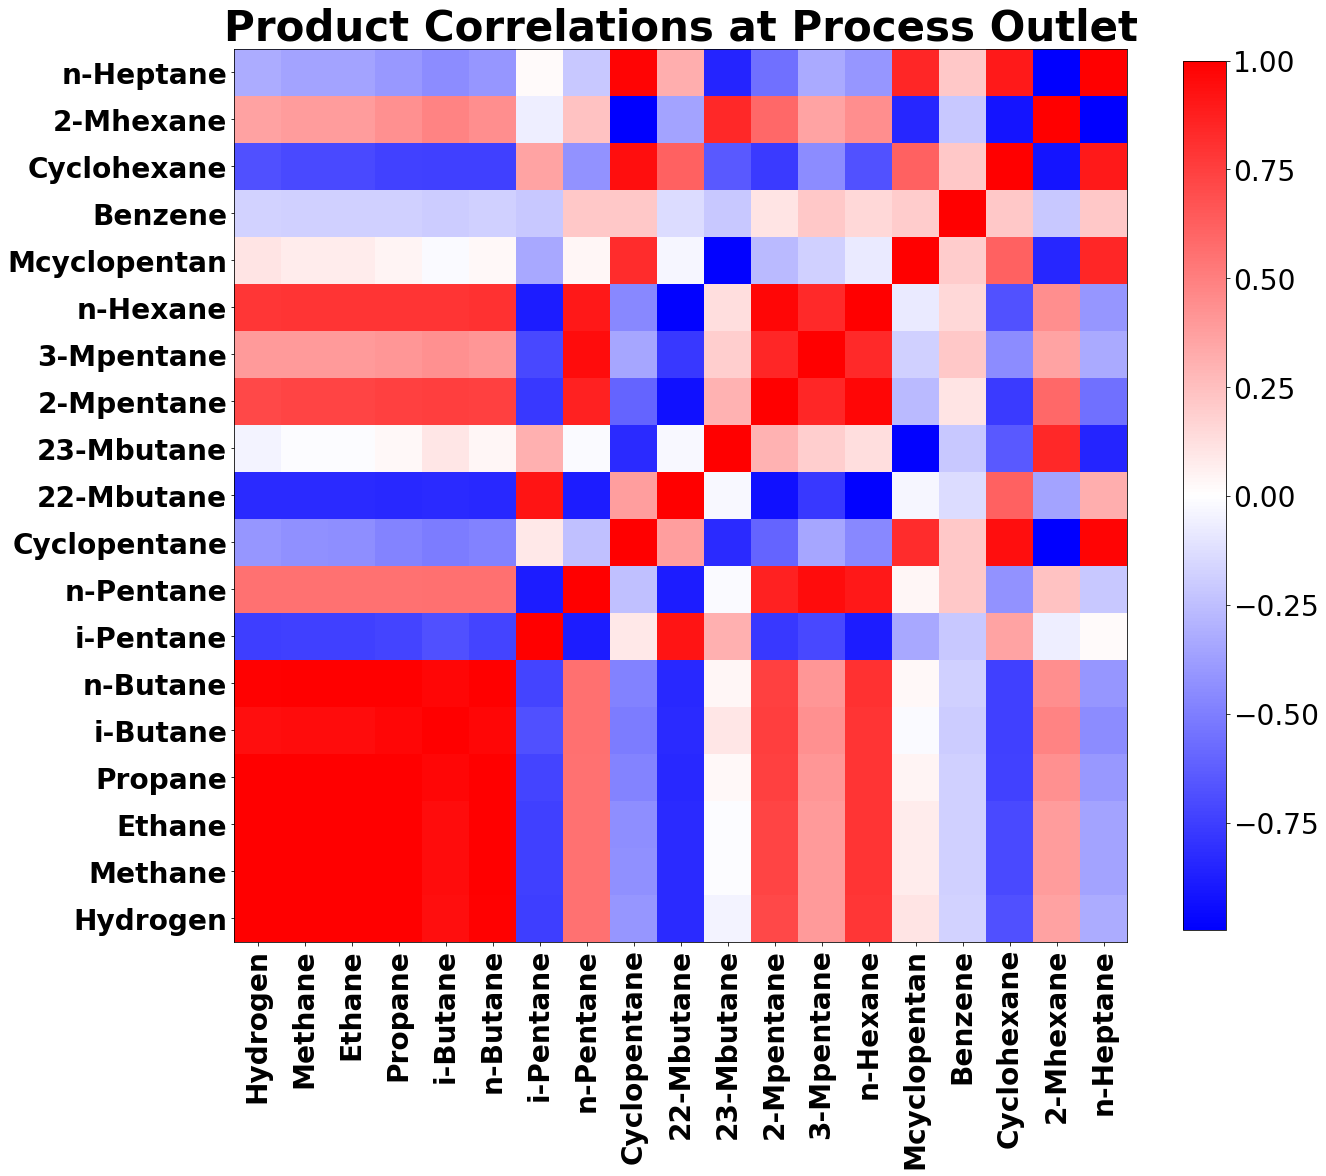

In [15]:
product_cols = [
"Hydrogen",
"Methane",
"Ethane",
"Propane",
"i-Butane",
"n-Butane",
"i-Pentane", 
"n-Pentane",
"Cyclopentane",
"22-Mbutane",
"23-Mbutane",
"2-Mpentane",
"3-Mpentane",
"n-Hexane",
"Mcyclopentan",
"Benzene",
"Cyclohexane",
"2-Mhexane",
"n-Heptane"]

actual_cols = ['process_%s' % c for c in product_cols]

corr_mat = dfe[actual_cols].corr('spearman')
n = len(actual_cols)

f, ax = plt.subplots(1, 1, figsize=(20, 20))
im = ax.imshow(corr_mat, origin='lower', cmap='bwr')
ax.set_xticks(np.arange(n))
ax.set_xticklabels(product_cols, rotation=90, fontsize=28, fontweight='bold')
ax.set_yticks(np.arange(n))
ax.set_yticklabels(product_cols, fontsize=28, fontweight='bold')
cbar = f.colorbar(im, ax=ax, shrink=0.8)
cbar.ax.tick_params(labelsize=28) 
ax.set_title("Product Correlations at Process Outlet", fontsize=42, fontweight='bold')
plt.savefig("tmp/fig4.tiff", bbox_inches='tight', transparent=True, pad_inches=0, dpi=300, 
            pil_kwargs={"compression": "tiff_lzw"})

In [13]:
# def compute_corr(packed):
#     df, col_a, col_b = packed
#     corr = pingouin.distance_corr(np.array(df[col_a]), np.array(df[col_b]), n_boot=None)
#     print("Finished %s %s" % (col_a, col_b))
#     return (col_a, col_b, corr)

# n_processes = 32
# with Pool(32) as p:
#     results = p.map(compute_corr, [(dfe, actual_cols[i], actual_cols[j])
#                                    for i in range(len(actual_cols))
#                                    for j in range(i+1, len(actual_cols))])